### Problem Statement: using the clustering module in pycaret package to perform customers' segmentation analysis based on RFM values


In [ ]:
# installing the pycaret package
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 21.0 MB/s eta 0

In [1]:
# check the version of pycaret
from pycaret.utils import version
version()

'3.1.0'

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# crreate a variable for the file to be read
file = "/content/UCI Online Retail-RFM"

In [4]:
# read the file
data = pd.read_csv(file)

In [5]:
# have a look at the first 5 rows of the dataset
data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,3,151,3598.21
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40


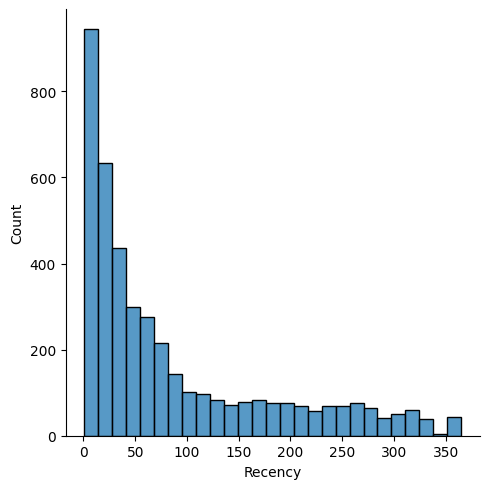

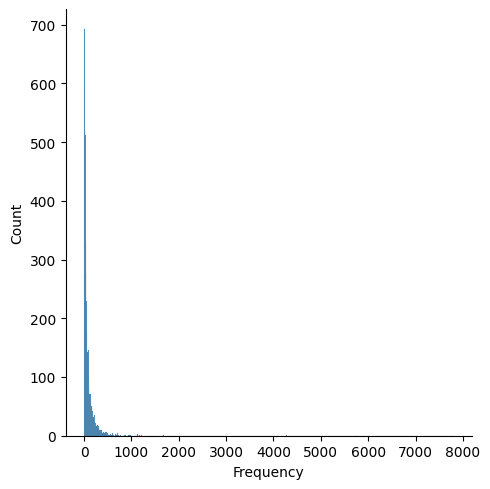

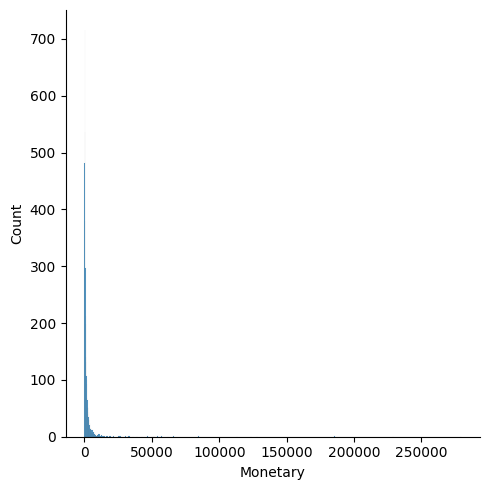

In [8]:
# viusalize the distribution of Recency. Frequency and Monetary
sns.displot(data['Recency'])
sns.displot(data['Frequency'])
sns.displot(data['Monetary']);

As noted in the charts above, the distritions are right-skewed.

In [9]:
# make a copy of the dataset for further processing
df = data.copy()

In [10]:
# understand the descriptive statistics of the dataset
df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4258.000000,4258.000000,4258.000000,4258.000000
mean,15293.656177,86.363316,92.024425,1880.916281
std,1720.269930,93.336569,228.508839,8027.881891
min,12346.000000,1.000000,1.000000,0.000000
25%,13811.250000,17.000000,18.000000,297.822500
50%,15288.500000,47.000000,42.000000,652.720000
75%,16774.750000,130.000000,100.000000,1603.767500
max,18287.000000,365.000000,7793.000000,279489.020000


In [17]:
# due to the mean and stanadard deviation as well as the range varies greatly for the Recency, Frequency and Monetary columns, we will need to normalize and standardize them. These will be handled by the pycaret package but we will modify the Monetary so that the min value is not 0
df.Monetary = df.Monetary + 1

In [ ]:
df.Monetary.min()

1.0

In [11]:
# import the clustering package from pycaret
from pycaret.clustering import *

In [12]:
# setting up the experiment with some parameters
s = setup(df, normalize=True, normalize_method='robust', ignore_features = ['CustomerID'], session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(4258, 4)"
2,Transformed data shape,"(4258, 3)"
3,Ignore features,1
4,Numeric features,3
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [13]:
# intialize the kmeans clustering model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7315,5387.2932,0.6958,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
# understand the parameters of the model
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [15]:
# evaluating the model
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

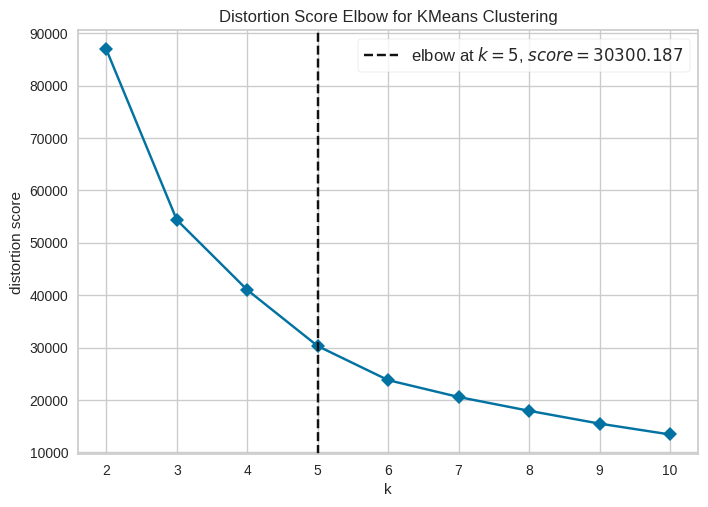

In [16]:
# assessing which is the appropriate no. of clusters through the elbow method (i.e. point of inflexion)
plot_model(kmeans, plot = 'elbow')

Based on the elbow chart, we can also try 3 clusters

In [17]:
# creating a model based on 3 clusters
kmeans_3 = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9538,5573.7093,0.5430,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

The Silhouette score improved greatly and based on this, let's use no. of clusters = 3.  Nevertheless, the number of clusters have to be discussed with business so that they will be in line with operations

In [18]:
# evaluate the model baed on 3 clusters
evaluate_model(kmeans_3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
# create a dataframe for the model
kmeans_df = assign_model(kmeans_3)

In [21]:
# have a look at the first 5 rows
kmeans_df.head()

,Recency,Frequency,Monetary,Cluster
0,326,2,0.000000,Cluster 0
1,3,151,3598.209961,Cluster 0
2,76,31,1797.239990,Cluster 0
3,19,73,1757.550049,Cluster 0
4,311,17,334.399994,Cluster 0


In [22]:
# analysis the RFM values by the different clusters
kmeans_df.groupby(['Cluster']).agg({'Recency':'mean', 'Frequency':'mean', 'Monetary' : ['mean', 'count']}).round(0)

Recency Frequency  Monetary      
             mean      mean      mean count
Cluster                                    
Cluster 0    87.0      84.0    1465.0  4238
Cluster 1     4.0     949.0  231182.0     3
Cluster 2     8.0    2014.0   65079.0    17

Based on the above, Clusters 1 and 2 will be our valued customers.

In [23]:
# combine with original dataset to obtain the customer id
cust_band = pd.concat([data, kmeans_df[['Cluster']]], axis=1)

In [24]:
# have a look at the last 5 records
cust_band.tail()

,CustomerID,Recency,Frequency,Monetary,Cluster
4253,18280,278,10,180.60,Cluster 0
4254,18281,181,7,80.82,Cluster 0
4255,18282,8,13,176.60,Cluster 0
4256,18283,4,756,2094.88,Cluster 0
4257,18287,43,70,1837.28,Cluster 0


In [25]:
# who are the customers in Cluster 1 (Premium customers)
cust_band.loc[(cust_band['Cluster'] == "Cluster 1")]

,CustomerID,Recency,Frequency,Monetary,Cluster
1665,14646,2,2085,279489.02,Cluster 1
3667,17450,9,348,185453.33,Cluster 1
4124,18102,1,415,228603.88,Cluster 1


In [27]:
# check if Cluster 1 customers are in the premium RFM list

cust_band_list = [14646, 17450, 18102]
premium_list = [14646, 14911, 17841, 18102]

for i in premium_list:
    if i in cust_band_list:
        print(f"{i} is in the RFM Premium list")
    else:
        print(f"{i} is not in the RFM Premium list")

14646 is in the RFM Premium list
14911 is not in the RFM Premium list
17841 is not in the RFM Premium list
18102 is in the RFM Premium list


In [28]:
# let's have a look at our Cluster 2 customers
cust_band.loc[(cust_band['Cluster'] == "Cluster 2")]

,CustomerID,Recency,Frequency,Monetary,Cluster
55,12415,25,778,123725.45,Cluster 2
322,12748,1,4271,27078.70,Cluster 2
551,13089,3,1816,54155.26,Cluster 2
981,13694,4,579,61810.98,Cluster 2
1266,14088,11,590,50415.49,Cluster 2
1271,14096,5,5128,57120.91,Cluster 2
1314,14156,10,1415,113069.44,Cluster 2
1414,14298,4,1640,50862.44,Cluster 2
1852,14911,2,5742,128161.04,Cluster 2
1955,15061,4,321,42799.24,Cluster 2


### We can also experiment with oother clustering models available in the package to refine our clusters in consultation with the business folks.  Though Clustering is an unsupervised machine learning model, it provides a quick and easy way to segment our customers based on a set of criteria.  At the end of the day, interactions between the Sales, Marketing and Finance departments are needed to refine the clusters to improve the sales share of these customers as well as determining whether certain concessions could be given.